# 03_gradient_descent

# Q1. 一変数の最急降下法について調べ、まとめよ。


# A1. 

**結論：**  
- 最急降下法とは、関数の傾きのみから、関数の最小値を探索する勾配法のアルゴリズムの一つ。  

**説明：**  
- 勾配法とは、関数の勾配を用いて最適な点を割り出す方法。  
- 最適な点とは、今回の内容では関数の最小値。  
- 最小値とはその関数がもつ最も小さい値。  
- 但し、最小値は見つけることができないため、極小値を見つける。  
- 極小値とは、局所的に定まる値。  
- 勾配法では、説明変数に与える値を反復させながら説明変数を極小値へ近づけていく。  
- k回目の反復で極小値がx^(k)の位置にある。  

引用：https://ja.wikipedia.org/wiki/%E6%9C%80%E6%80%A5%E9%99%8D%E4%B8%8B%E6%B3%95

<img src="images/gradient_descent.png">

勾配法の式  

<img src="images/delta.png">

上記式に値を入れて更新値を確認してみる。  
スタート地点**x0の値を-3**とする。
調整項**αの値を0.1**とする。  

<img src="images/update.png">

# Q2. y = 1.5x^{2} + e (e は平均0、標準偏差 0.1 の正規分布に従う確率変数) <br>を用いてデータを生成せよ。

# A.

<img src="images/e.png">

<img src="images/e_3.png">

上記式を用いてデータを作った様子をグラフに表現している。

In [23]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1, num=20)  # -1から1までの等差数列を20個作る
error = np.random.normal(0, 0.1, 20)  # 平均0, 標準偏差0.1 の正規分布に則ったランダム値を20個作る

y = [1.5*x**2 + e for x, e in zip(x_data, error)]  # y = 1.5*x^2 + eの関数

y

[1.5320618771861483,
 1.0864842301191855,
 0.9110738253368348,
 0.5358604111551,
 0.5739433397587663,
 0.1616739447952808,
 0.4918476115911213,
 0.20848888979980398,
 0.15585015765048624,
 -0.10196864974132991,
 0.28132883161992533,
 -0.041099505321222855,
 0.20258728898151665,
 -0.005271957403057276,
 0.36255809681634515,
 0.32098436565577915,
 0.8414286974097898,
 1.0042386416084046,
 1.169472067961011,
 1.4753902033329271]

In [24]:
x_data

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [25]:
correct_data = pd.DataFrame({"y": y, "x": x_data})
correct_data  # データを作成

,y,x
0,1.532062,-1.000000
1,1.086484,-0.894737
2,0.911074,-0.789474
3,0.535860,-0.684211
4,0.573943,-0.578947
5,0.161674,-0.473684
6,0.491848,-0.368421
7,0.208489,-0.263158
8,0.155850,-0.157895
9,-0.101969,-0.052632


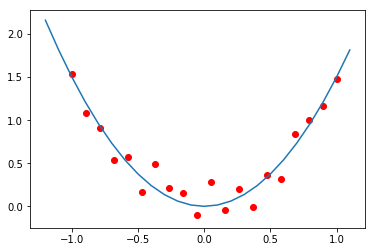

In [26]:
# plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '*')
x = np.arange(-1.2, 1.2, 0.1)
y = 1.5*x**2
plt.plot(x,y)
plt.scatter(correct_data["x"], correct_data["y"], color="red")

# plt.ylim(-2,2)
plt.show()

# Q3. 2で生成したデータに対して、最急降下法を用いて<br>最小二乗誤差を最小化するように y = ax^{2} のパラメータ a を<br>決定するプログラムを書き、実行せよ。また、その際に用いた式を書け。

# A.3